In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import fractions


def complex_fraction_formatter(x):
    def fraction_str(n):
        return str(fractions.Fraction(n).limit_denominator())

    if isinstance(x, complex):
        real_part = fraction_str(x.real)
        imag_part = fraction_str(x.imag)
        return f"({real_part} + {imag_part}j)"
    else:
        return fraction_str(x)

    
np.set_printoptions(formatter={'all': complex_fraction_formatter})


def plot_complex_numbers_with_hull(numbers, n_dimensions, title='Field of Values with Convex Hull', output="figs/output.png"):

    
    x_range=(-0.8, 2.8)
    y_range=(-0.8, 0.8)

    # Convert complex numbers to a 2D array of points
    points = np.array([[num.real, num.imag] for num in numbers])

    # Compute the convex hull
    hull = ConvexHull(points, qhull_options="QJ Pp")

    # Plotting the complex numbers
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], color='blue')

    # Plotting the convex hull
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

    # Filling the convex hull
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.1)

    # Setting plot properties
    plt.title(title)
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.xlim(x_range)
    #plt.ylim(y_range)
    plt.axhline(y=0, color='k')  # x-axis
    plt.axvline(x=0, color='k')  # y-axis
    plt.grid(True)
    plt.savefig(output)

def generate_random_unit_vector(n):
    """
    Generate a random unit vector in C^n.

    :param n: Number of dimensions
    :return: A unit vector in C^n
    """
    # Generate a random complex vector
    random_vector = np.random.randn(n) + 1j * np.random.randn(n)

    # Normalize the vector to make it a unit vector
    norm = np.linalg.norm(random_vector)
    unit_vector = random_vector / norm

    return unit_vector


def redheffer_matrix(n):
    matrix = np.zeros((n, n), dtype=int)
    for i in range(1, n+1):
        for j in range(1, n+1):
            if j == 1 or j % i == 0:
                matrix[i-1, j-1] = 1
    return matrix


n = 20000

for n_dimensions in range(0, n, 5):
    points = []
    draws = 200
    A = redheffer_matrix(n_dimensions)
    for i in range(draws):
        u = generate_random_unit_vector(n_dimensions)
        points.append(np.dot(np.dot(u.conj().T, A), u))
    title = f'Complex Numbers with Convex Hull n={n_dimensions}'
    plot_complex_numbers_with_hull(points, n_dimensions, title=title, output=f"figs/redheffer_field_of_values_{n_dimensions}.png")

In [11]:
for im in images:
    im.close()

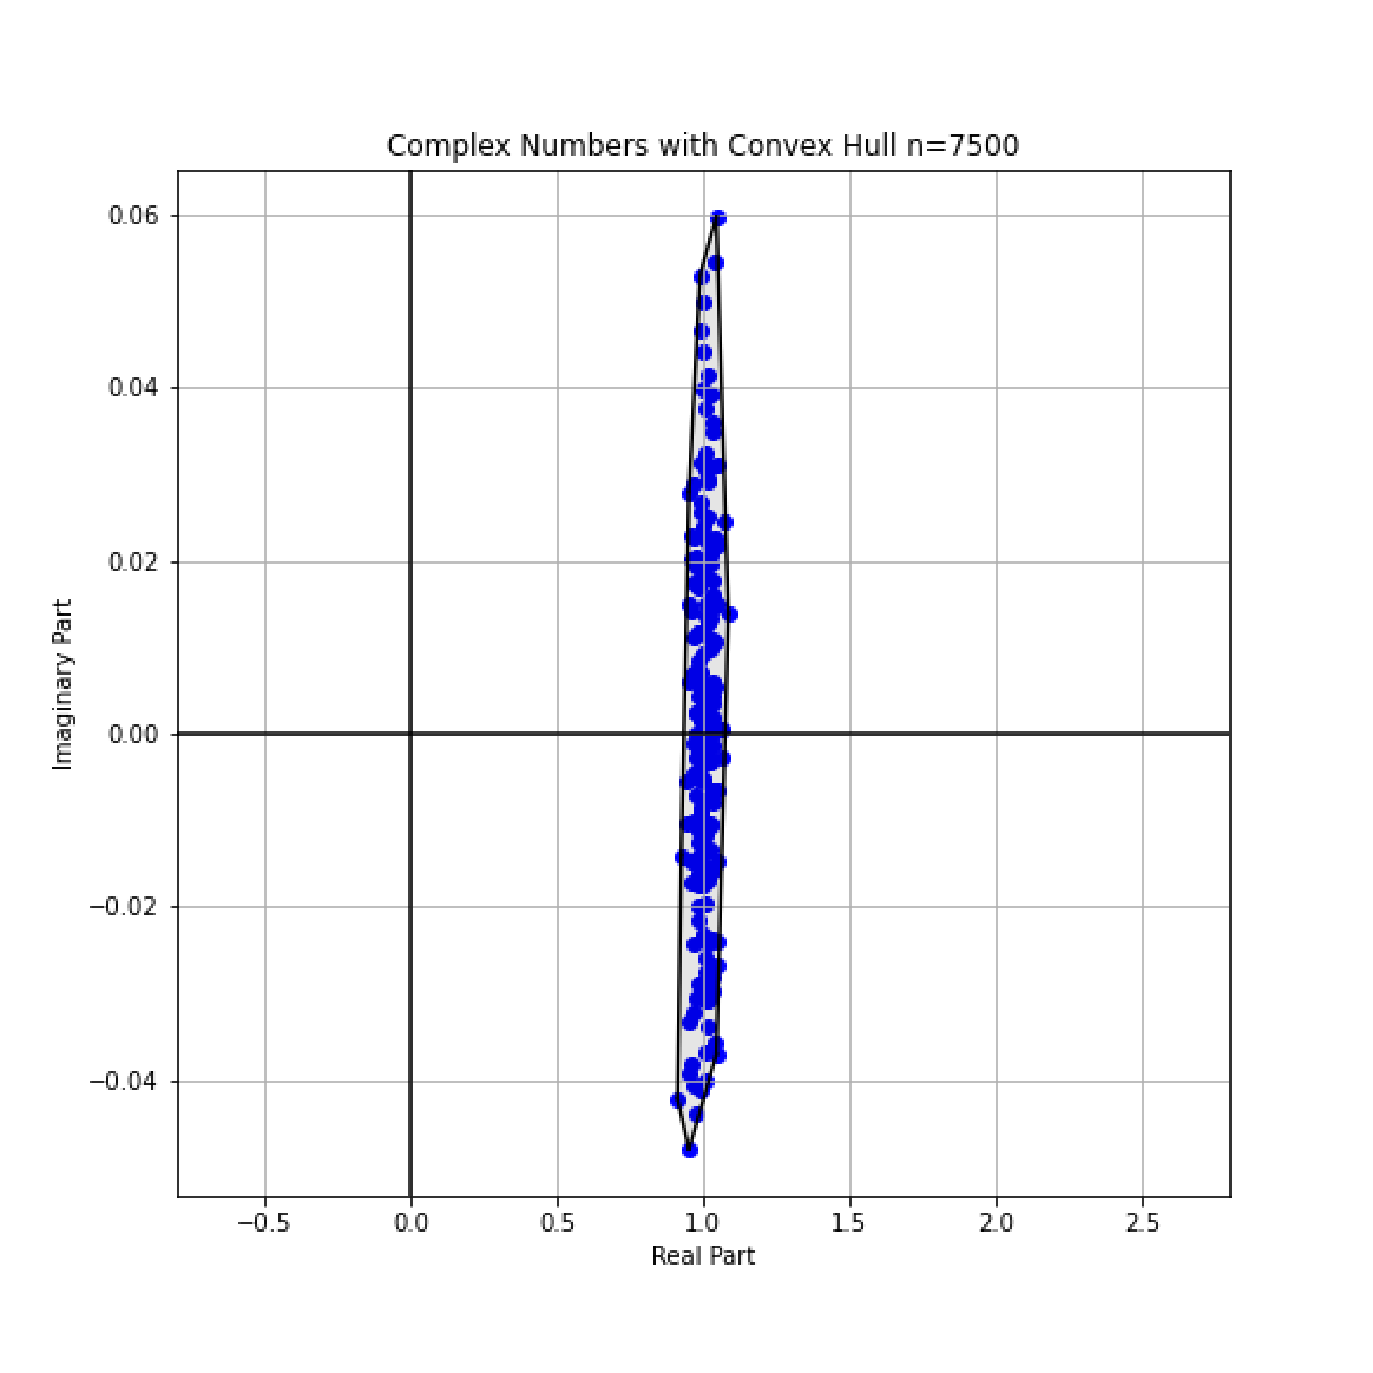

In [1]:
# Import necessary libraries
import os
import re
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Function to extract frame number from filename
def extract_frame_number(filename):
    match = re.search(r"_([0-9]+)\.png$", filename)
    return int(match.group(1)) if match else -1

# Directory containing the images
image_directory = './figs'  # Change this to your directory

# Get list of image files and sort them by frame number
image_files = [f for f in os.listdir(image_directory) if f.endswith('.png')]
image_files.sort(key=extract_frame_number)

# Select the first 100 images and then every 500th image
selected_files = image_files[:100] + image_files[100::200]

# Load the images
images = [Image.open(os.path.join(image_directory, f)) for f in selected_files]

# Create a figure for the animation
fig, ax = plt.subplots(figsize=(25,25))

# Initialize the first image (required for the update function)
im = ax.imshow(images[0], cmap='gray', interpolation='none')

# Hide axes
ax.axis('off')

# Update function for animation
def update(frame):
    im.set_data(images[frame])
    return (im,)

# Create animation
ani = FuncAnimation(fig, update, frames=len(images), blit=True)

# Display the animation in Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

# Optionally, save the animation to a file
# ani.save('/path/to/save/animation.mp4', writer='ffmpeg')


In [3]:
ani.save('animation.mp4', writer='ffmpeg', fps=20)

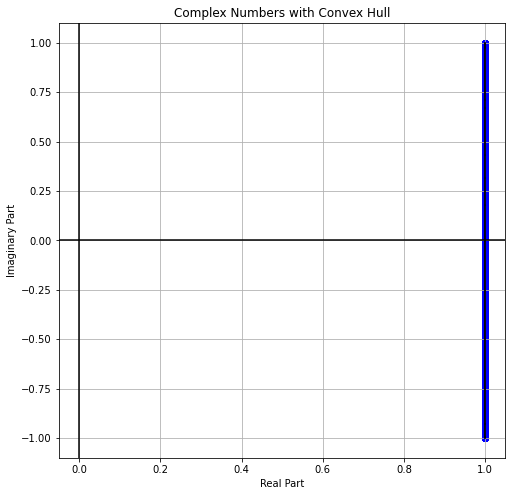

In [9]:
A = np.array([
    [1, -1j],
    [-1j, 1],
])
points = []
draws = 20000
n_dimensions = 2
for i in range(draws):
    u = generate_random_unit_vector(n_dimensions)
    points.append(np.dot(np.dot(u.conj().T, A), u))

plot_complex_numbers_with_hull(points)

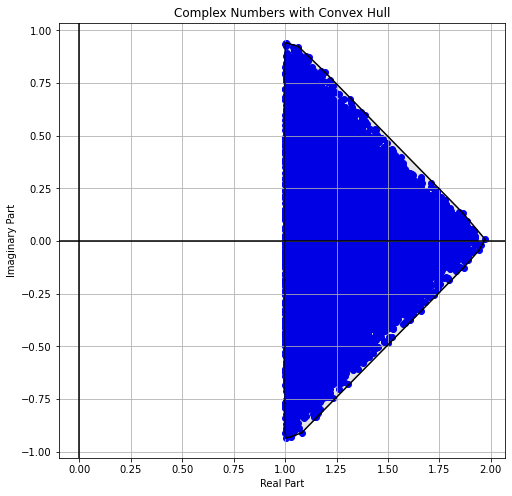

In [15]:
A = np.array([
    [1, -1j, 0, 0],
    [-1j, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 2]
])


points = []
draws = 20000
n_dimensions = 4
for i in range(draws):
    u = generate_random_unit_vector(n_dimensions)
    points.append(np.dot(np.dot(u.conj().T, A), u))

plot_complex_numbers_with_hull(points)

In [ ]:
def redheffer_matrix(n):
    matrix = np.zeros((n, n), dtype=int)
    for i in range(1, n+1):
        for j in range(1, n+1):
            if j == 1 or j % i == 0:
                matrix[i-1, j-1] = 1
    return matrix

points = []
draws = 200
n_dimensions = 50000
A = redheffer_matrix(n_dimensions)
for i in range(draws):
    u = generate_random_unit_vector(n_dimensions)
    points.append(np.dot(np.dot(u.conj().T, A), u))

plot_complex_numbers_with_hull(points)